<a href="https://colab.research.google.com/github/carlosdaniellopezgordillo/Emisiones_de_gases_CDMX/blob/main/Emisiones_de_gases_CDMX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Paso 1: Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Paso 2: Cargar el archivo CSV
data = pd.read_csv('/content/rama_2023_05 (1).csv')

In [ ]:
# Paso 3: Procesar columnas de fecha y tiempo
data['fecha'] = pd.to_datetime(data['fecha'])
data['hora'] = data['fecha'].dt.hour
data['dia_semana'] = data['fecha'].dt.dayofweek  # 0=Lunes, 6=Domingo
data['mes'] = data['fecha'].dt.month
data['anio'] = data['fecha'].dt.year


In [ ]:
# Crear columnas para los periodos específicos
data['periodo'] = ['Diurno' if 6 <= h < 18 else 'Nocturno' for h in data['hora']]
data['tipo_dia'] = ['Laborable' if d <= 4 else 'Finde' for d in data['dia_semana']]
data['estacion'] = data['mes'].map({
    12: 'Invierno', 1: 'Invierno', 2: 'Invierno',
    3: 'Primavera', 4: 'Primavera', 5: 'Primavera',
    6: 'Verano', 7: 'Verano', 8: 'Verano',
    9: 'Otoño', 10: 'Otoño', 11: 'Otoño'
})


In [ ]:
# Paso 4: Definir contaminantes
contaminantes = ['CO', 'NO', 'NO2', 'NOX', 'O3', 'PM10', 'PM25', 'SO2']


In [ ]:
# Paso 5: Análisis por períodos
# Promedios por período diurno/nocturno
promedios_periodo = data.groupby('periodo')[contaminantes].mean()
print("Promedios por periodo (Diurno/Nocturno):")
print(promedios_periodo)

Promedios por periodo (Diurno/Nocturno):
                CO         NO        NO2        NOX         O3       PM10  \
periodo                                                                     
Nocturno  0.481926  14.712425  23.030057  37.996908  30.486331  41.892833   

               PM25       SO2  
periodo                        
Nocturno  21.327371  3.689885  


In [ ]:
# Promedios por tipo de día (Laborable/Fines de semana)
promedios_tipo_dia = data.groupby('tipo_dia')[contaminantes].mean()
print("Promedios por tipo de día (Laborable/Fines de semana):")
print(promedios_tipo_dia)

Promedios por tipo de día (Laborable/Fines de semana):
                 CO         NO        NO2        NOX         O3       PM10  \
tipo_dia                                                                     
Finde      0.437529  11.054995  20.806640  32.091746  31.754172  39.157446   
Laborable  0.499685  16.175397  23.919423  40.358973  29.979195  42.986988   

                PM25       SO2  
tipo_dia                        
Finde      21.049932  3.784693  
Laborable  21.438347  3.651961  


In [ ]:
# Promedios por estación (Invierno, Primavera, Verano, Otoño)
promedios_estacion = data.groupby('estacion')[contaminantes].mean()
print("Promedios por estación:")
print(promedios_estacion)

Promedios por estación:
                 CO         NO        NO2        NOX         O3       PM10  \
estacion                                                                     
Invierno   0.607501  22.007929  28.060944  50.418403  27.496782  53.232602   
Otoño      0.456926  14.437283  21.567895  36.262810  25.463706  34.327761   
Primavera  0.458955  12.311822  22.647189  35.288272  38.530033  48.606968   
Verano     0.399245   9.943696  19.568570  29.578411  29.577533  29.789178   

                PM25       SO2  
estacion                        
Invierno   24.753257  5.350563  
Otoño      17.972893  3.518776  
Primavera  25.145793  3.248529  
Verano     16.714316  2.593444  


In [ ]:
# Paso 6: Tendencias anuales
promedios_anuales = data.groupby('anio')[contaminantes].mean()
print("Promedios anuales de contaminantes:")
print(promedios_anuales)

Promedios anuales de contaminantes:
            CO         NO        NO2        NOX         O3       PM10  \
anio                                                                    
2015  0.731951  19.097210  26.106315  45.201168  27.736406  43.215921   
2016  0.641039  17.659205  25.666365  43.323528  30.145751  42.677659   
2017  0.582467  16.453825  25.446013  41.893415  31.039960  45.429294   
2018  0.430112  15.967338  24.426956  40.364020  29.825308  42.851119   
2019  0.380393  13.215918  21.509225  35.295448  31.195496  42.138091   
2020  0.321135  10.369880  18.890937  29.725936  31.684256  37.352872   
2021  0.384393  12.764627  20.856912  34.092821  29.513921  39.468897   
2022  0.394284  12.516279  21.096484  34.006056  31.003063  39.200293   
2023  0.456884  13.888020  23.623159  38.192550  34.702303  48.706505   

           PM25       SO2  
anio                       
2015  23.574900  4.509356  
2016  22.031209  4.529531  
2017  22.731652  4.647623  
2018  22.782071  4.1

<Figure size 1000x600 with 0 Axes>

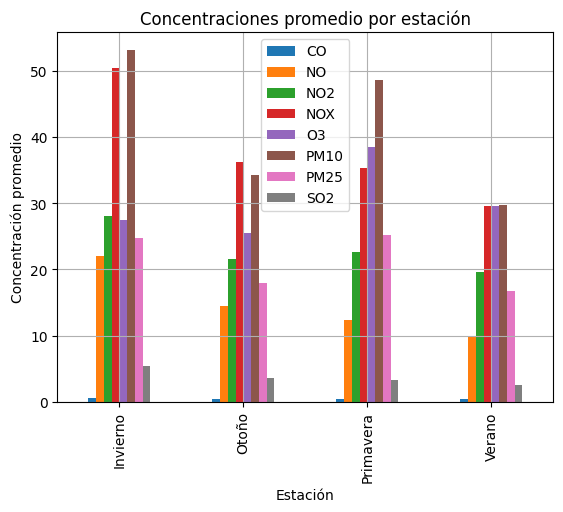

In [ ]:
# Paso 7: Visualización
# Gráfico de promedios por estación
plt.figure(figsize=(10, 6))
promedios_estacion.plot(kind='bar')
plt.title('Concentraciones promedio por estación')
plt.xlabel('Estación')
plt.ylabel('Concentración promedio')
plt.grid(True)
plt.show()

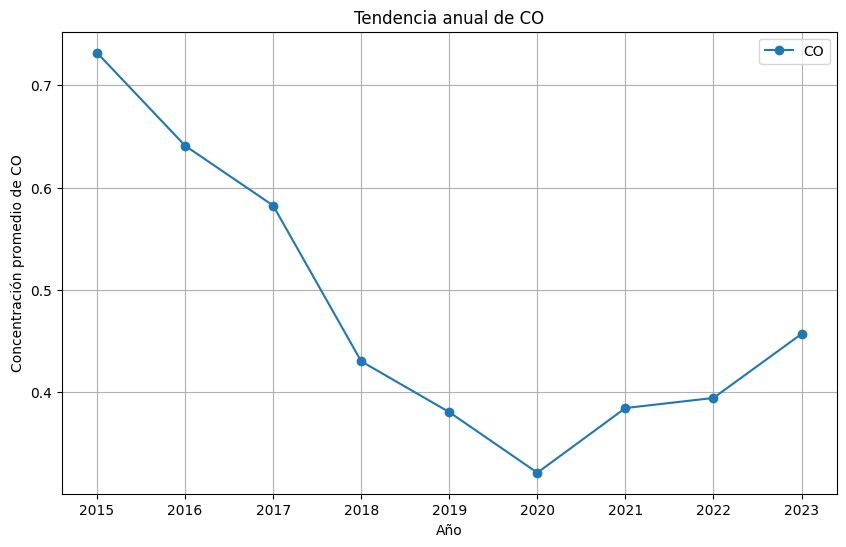

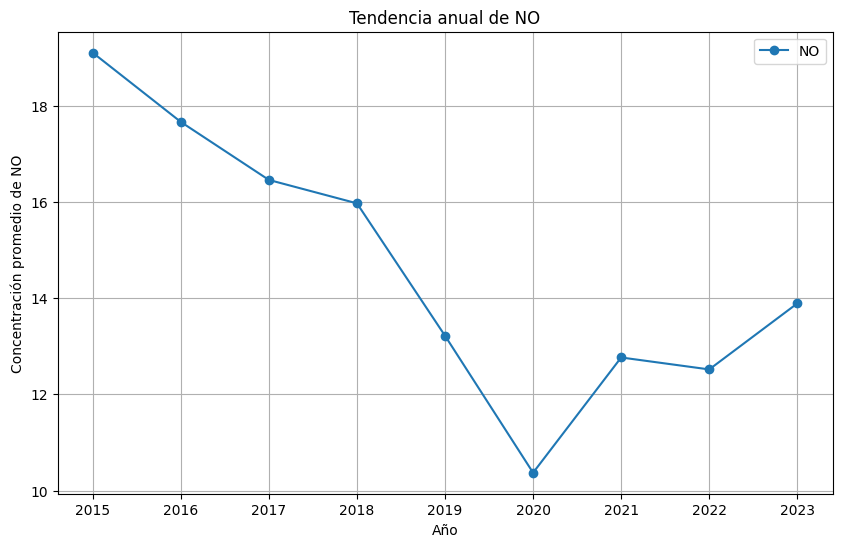

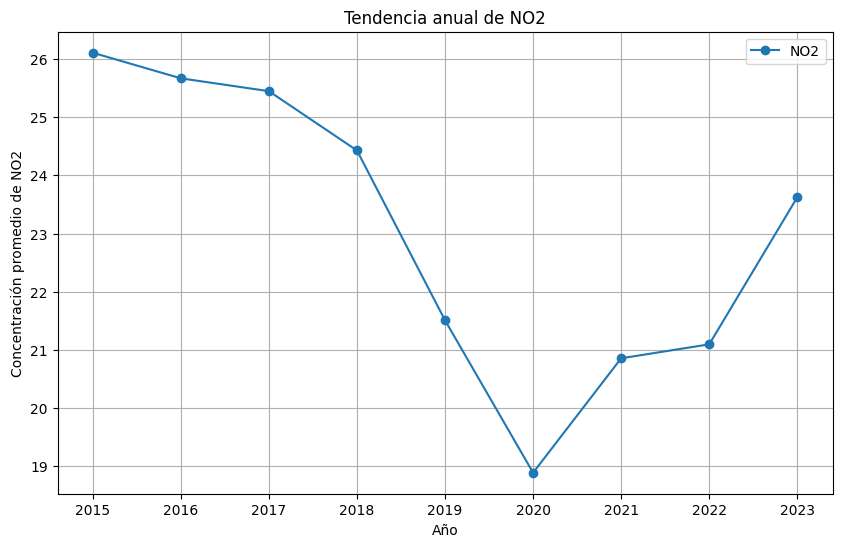

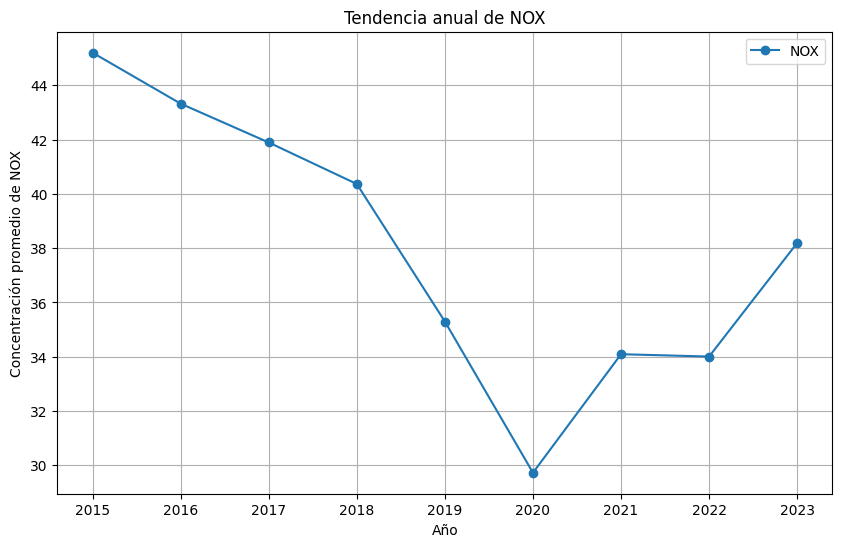

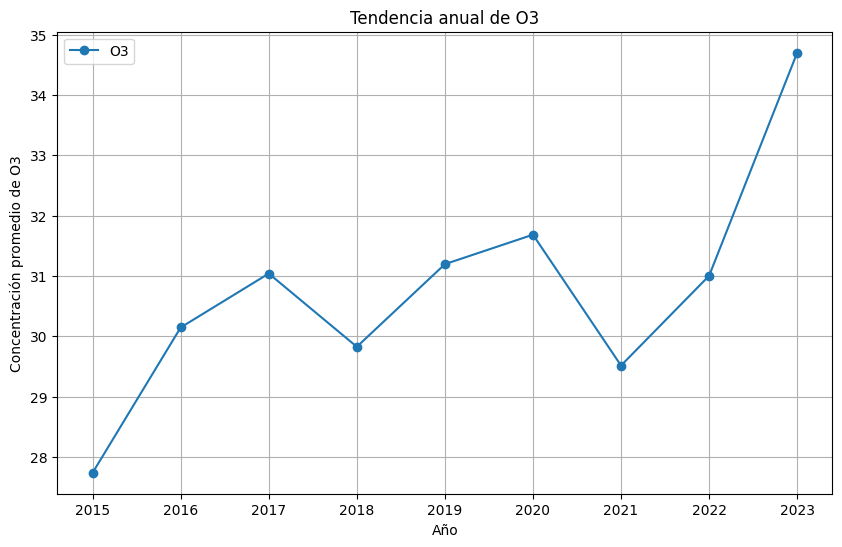

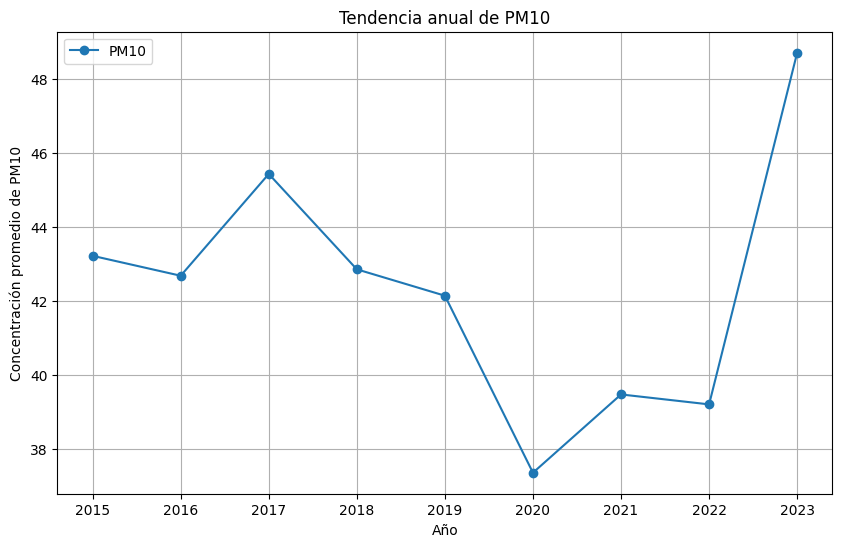

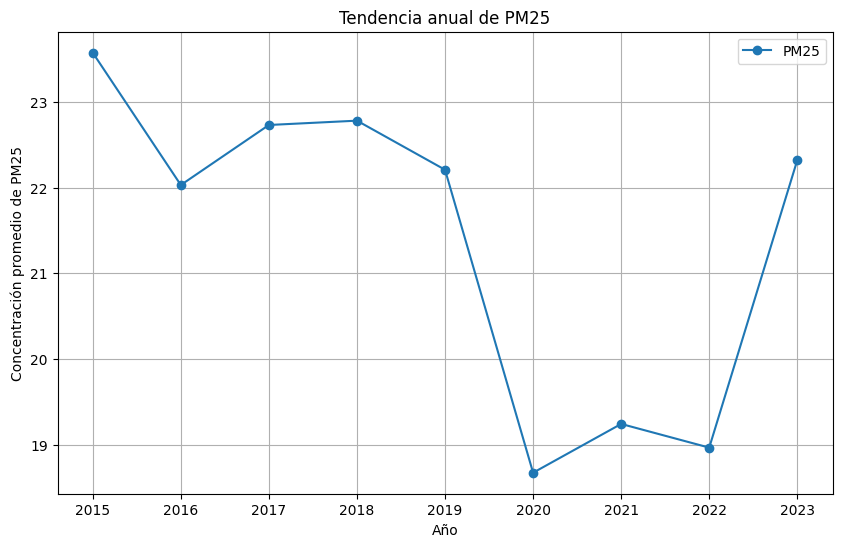

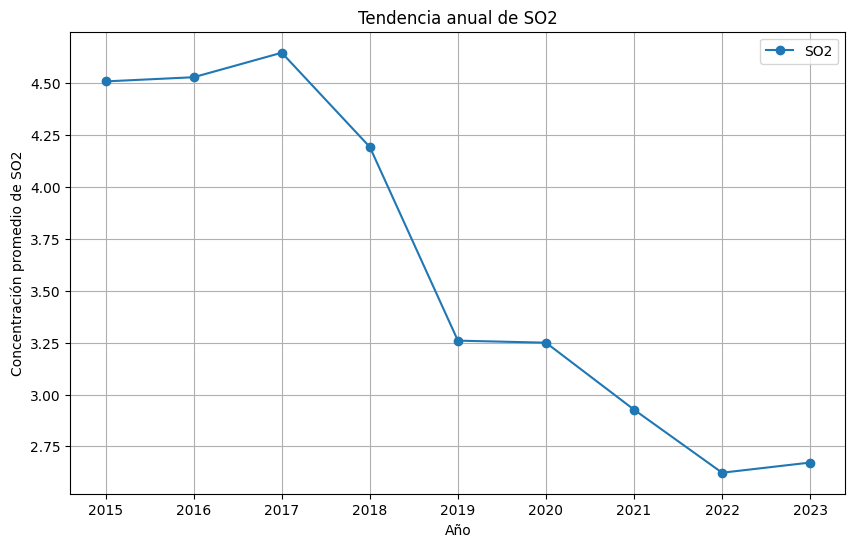

In [ ]:
# Gráfico de tendencias anuales para cada contaminante
for contaminante in contaminantes:
    plt.figure(figsize=(10, 6))
    plt.plot(promedios_anuales.index, promedios_anuales[contaminante], marker='o', label=contaminante)
    plt.title(f'Tendencia anual de {contaminante}')
    plt.xlabel('Año')
    plt.ylabel(f'Concentración promedio de {contaminante}')
    plt.grid(True)
    plt.legend()
    plt.show()


In [ ]:
# Exportar las tendencias anuales a un archivo CSV
promedios_anuales.to_csv('promedios_anuales_contaminantes.csv', index=True)


<Figure size 1000x600 with 0 Axes>

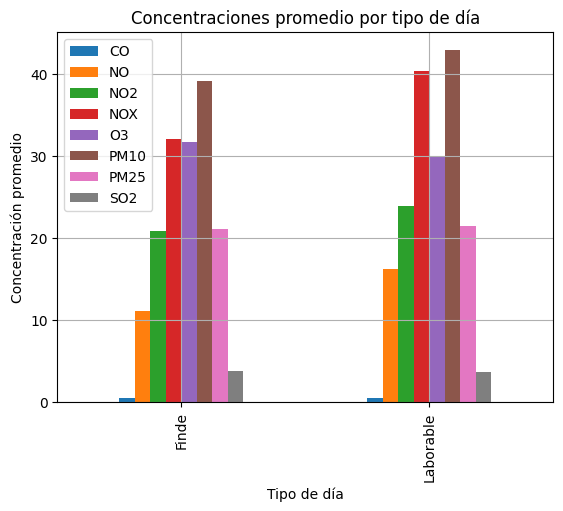

In [ ]:
# Gráfico de comparativa por tipo de día
plt.figure(figsize=(10, 6))
promedios_tipo_dia.plot(kind='bar')
plt.title('Concentraciones promedio por tipo de día')
plt.xlabel('Tipo de día')
plt.ylabel('Concentración promedio')
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

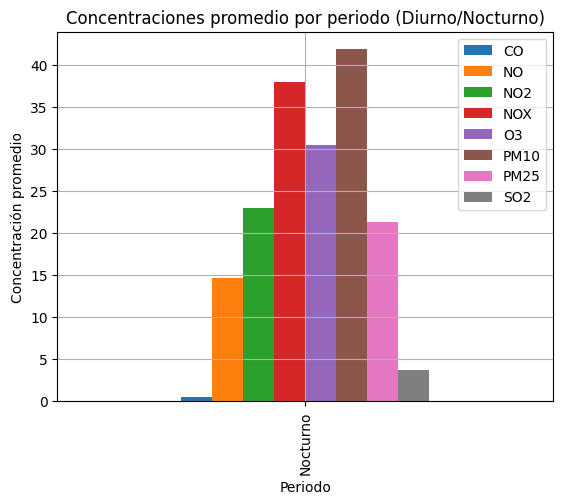

In [ ]:
# Gráfico de comparativa por periodo diurno/nocturno
plt.figure(figsize=(10, 6))
promedios_periodo.plot(kind='bar')
plt.title('Concentraciones promedio por periodo (Diurno/Nocturno)')
plt.xlabel('Periodo')
plt.ylabel('Concentración promedio')
plt.grid(True)
plt.show()